## Deep Learning - Course Project

The course project will review John Hollinger's NBA Advanced Statistics, namely Player Efficiency Rating (PER)

PER is considered an advanced statistic that takes into account all of a players positive/negative contributions to a game and returns them in a single, weighted measure

****Data dictionary****:

Each observation represents an individual player's Hollinger stats for that season. Columns and their appropriate definition follows as detailed by ESPN.com are as follows:

rank that player's PER rank for that given season

ts% True Shooting Percentage - what a player's shooting percentage would be if we accounted for free throws and 3-pointers. True Shooting Percentage = Total points / [(FGA + (0.44 x FTA)]

ast Assist Ratio - the percentage of a player's possessions that ends in an assist. Assist Ratio = (Assists x 100) divided by [(FGA + (FTA x 0.44) + Assists + Turnovers]

to Turnover Ratio - the percentage of a player's possessions that end in a turnover. Turnover Ratio = (Turnover x 100) divided by [(FGA + (FTA x 0.44) + Assists + Turnovers]

usg Usage Rate - the number of possessions a player uses per 40 minutes. Usage Rate = {[FGA + (FT Att. x 0.44) + (Ast x 0.33) + TO] x 40 x League Pace} divided by (Minutes x Team Pace)

orr Offensive rebound rate

drr Defensive rebound rate

rebr Rebound Rate - the percentage of missed shots that a player rebounds. Rebound Rate = (100 x (Rebounds x Team Minutes)) divided by [Player Minutes x (Team Rebounds + Opponent Rebounds)]

per Player Efficiency Rating is the overall rating of a player's per-minute statistical production. The league average is 15.00 every season.

va Value Added - the estimated number of points a player adds to a teamâ€™s season total above what a 'replacement player' (for instance, the 12th man on the roster) would produce. Value Added = ([Minutes * (PER - PRL)] / 67). PRL (Position Replacement Level) = 11.5 for power forwards, 11.0 for point guards, 10.6 for centers, 10.5 for shooting guards and small forwards

ewa Estimated Wins Added - Value Added divided by 30, giving the estimated number of wins a player adds to a team's season total above what a 'replacement player' would produce.

PER - sums up all a player's positive accomplishments, subtracts the negative accomplishments, and returns a per-minute rating of a player's performance

### Objective

The objective of this assignment is to use advanced statistics, from John hollinger's advanced NBA  Statistics, in an attempt to both understand what affects a players PER, as well as to provide predictions of PER based on said statistics. The PER formula is an unknown - it is not shared in any literature, making this exercise a worthwhile one for somebody who seeks to understand the number better. 

This analysis (Part 1) was undertaken earlier in the course, during the regression course. Three different types of regression (vanilla linear, Ridge, Lasso) were modeled, and it was found that, when considering model complexity, computational time (amongst other things) that the model that best met the joint criteria of explain-ability and accuracy as the vanilla linear regression model – the model was accurate on a holdout/testing set (86% accuracy) with great explain-ability (6 linearly combined variables). 
The objective of this exercise will be to attempt to model the situation using a standard feedforward neural network, to see if we can improve the analysis over and above the vanilla linear regression.

To determine this, the following input statistics will be used from Hollinger's NBA advanced statistics:

1. ts% True Shooting Percentage - what a player's shooting percentage would be if we accounted for free throws and 3-pointers. True Shooting Percentage = Total points / [(FGA + (0.44 x FTA)]

2. ast Assist Ratio - the percentage of a player's possessions that ends in an assist. Assist Ratio = (Assists x 100) divided by [(FGA + (FTA x 0.44) + Assists + Turnovers]

3. to Turnover Ratio - the percentage of a player's possessions that end in a turnover. Turnover Ratio = (Turnover x 100) divided by [(FGA + (FTA x 0.44) + Assists + Turnovers]

4. usg Usage Rate - the number of possessions a player uses per 40 minutes. Usage Rate = {[FGA + (FT Att. x 0.44) + (Ast x 0.33) + TO] x 40 x League Pace} divided by (Minutes x Team Pace)

5. orr Offensive rebound rate

6. drr Defensive rebound rate

7. rebr Rebound Rate - the percentage of missed shots that a player rebounds. Rebound Rate = (100 x (Rebounds x Team Minutes)) divided by [Player Minutes x (Team Rebounds + Opponent Rebounds)]

8. Minutes per game (mpg): the amount a player plays - affects usage and efficiency

### Data Loading & Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits as mp
import mpl_toolkits
import seaborn as sns
sns.set()

In [2]:
# read in the data:
# data downloaded and saved as a csv from Kaggle datasets
data = pd.read_csv('hollingersStats.csv')
data.head()

,Unnamed: 0,rank,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,per,va,ewa,player,team,season
0,1,1,75,39.4,0.564,15.0,7.1,32.6,5.0,14.6,9.5,31.01,452.0,15.1,Tracy McGrady,ORL,2002-03
1,2,2,67,37.8,0.602,10.7,10.1,27.8,11.0,21.6,16.5,29.43,356.2,11.9,Shaquille O'Neal,LAL,2002-03
2,3,3,82,41.5,0.550,16.0,9.6,31.1,3.0,15.3,9.3,27.07,420.6,14.0,Kobe Bryant,LAL,2002-03
3,4,4,82,40.5,0.553,20.4,9.4,25.0,9.0,28.5,18.8,26.46,370.8,12.4,Kevin Garnett,MIN,2002-03
4,5,5,81,39.3,0.564,14.1,11.1,25.7,10.0,27.3,19.0,26.46,355.0,11.8,Tim Duncan,SA,2002-03


In [3]:
# no need for columns Unnamed, rank, gp, va, ewa, player, team, season
# will evaluate all data for multiple seasons from 2005-03 to 2017-18
per_data = data[['mpg', 'ts%', 'ast', 'to', 'usg', 'orr', 'drr', 'rebr', 'per']]
per_data.head()

,mpg,ts%,ast,to,usg,orr,drr,rebr,per
0,39.4,0.564,15.0,7.1,32.6,5.0,14.6,9.5,31.01
1,37.8,0.602,10.7,10.1,27.8,11.0,21.6,16.5,29.43
2,41.5,0.550,16.0,9.6,31.1,3.0,15.3,9.3,27.07
3,40.5,0.553,20.4,9.4,25.0,9.0,28.5,18.8,26.46
4,39.3,0.564,14.1,11.1,25.7,10.0,27.3,19.0,26.46


In [4]:
# get the shape of the data and data types
print('Number of Rows:' , per_data.shape[0])
print('Number of Columns', per_data.shape[1])
data.info()

Number of Rows: 5404
Number of Columns 9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5404 entries, 0 to 5403
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5404 non-null   int64  
 1   rank        5404 non-null   int64  
 2   gp          5404 non-null   int64  
 3   mpg         5404 non-null   float64
 4   ts%         5404 non-null   float64
 5   ast         5404 non-null   float64
 6   to          5404 non-null   float64
 7   usg         5404 non-null   float64
 8   orr         5404 non-null   float64
 9   drr         5404 non-null   float64
 10  rebr        5404 non-null   float64
 11  per         5404 non-null   float64
 12  va          5404 non-null   float64
 13  ewa         5404 non-null   float64
 14  player      5404 non-null   object 
 15  team        5404 non-null   object 
 16  season      5404 non-null   object 
dtypes: float64(11), int64(3), object(3)
memory usage: 717.8+ KB


Note that for all entries (5404 rows/records) there are non-null values

#### Exploratory Analysis

Will check each measure at a time vs PER on combined graphs to check for relationship to PER

In [5]:
# first, will get an idea of the data range using the describe feature
per_data.describe()

,mpg,ts%,ast,to,usg,orr,drr,rebr,per
count,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000
mean,24.545448,0.531777,15.992746,11.131625,18.066155,5.375093,14.653349,10.013583,14.281956
std,7.954939,0.048009,8.033157,2.880580,4.733323,3.851429,5.817942,4.535166,4.252705
min,7.000000,0.338000,1.200000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.900000,0.502000,10.000000,9.200000,14.700000,2.000000,10.000000,6.200000,11.320000
50%,24.400000,0.532000,14.100000,10.900000,17.700000,4.000000,13.600000,8.950000,13.920000
75%,31.200000,0.563000,20.600000,12.700000,21.100000,8.100000,18.600000,13.300000,16.630000
max,43.100000,0.725000,48.700000,29.600000,42.500000,22.000000,38.000000,26.700000,31.760000


Note the Mean/Median of the PER is 14.28/13.92. this is reasonably close to the 'average' of PER (as defined by Hollinger) of 15.0. Also, due to the removal of the EWA metric, there are no negative values

In [6]:
# check the histogram distributions of each input to see how the input data will be distributed
y_col = 'per'

X = per_data.drop(y_col, axis = 1)
y = per_data[y_col]

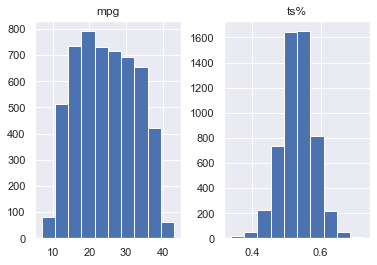

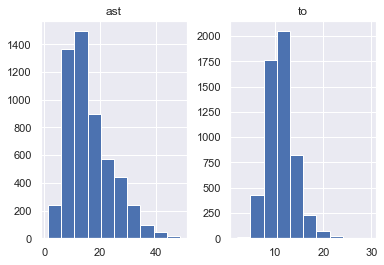

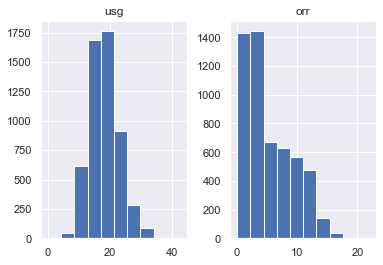

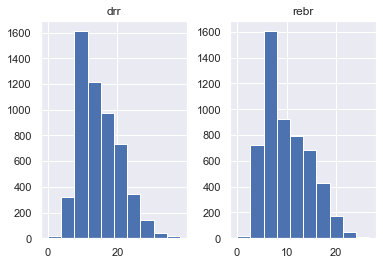

In [7]:
# generate histograms for all of the X data
mpgts = X.hist(column = ['mpg', 'ts%'])
astto = X.hist(column = ['ast', 'to'])
usgorr = X.hist(column = ['usg', 'orr'])
drrrebr = X.hist(column = ['drr', 'rebr'])

With the exception of rebounding rates (drr, orr, rebr) and assist rates, the data looks to be mostly normally distributed. 

Could remove outliers or check to see how each is realted to the target (PER)

<AxesSubplot:>

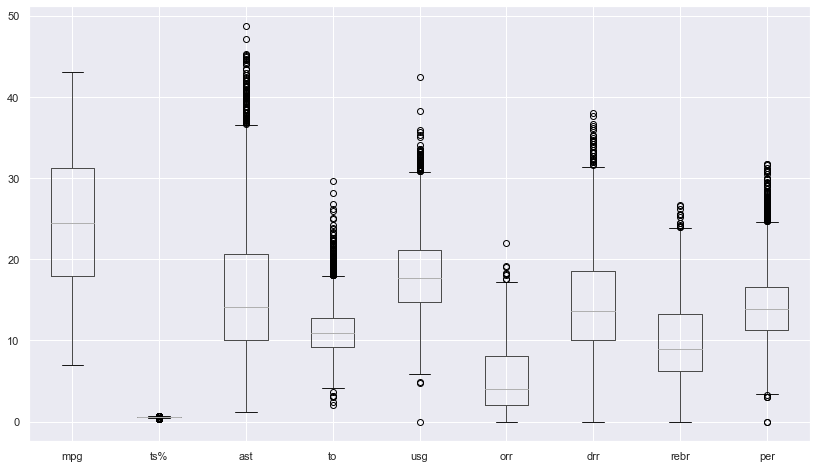

In [8]:
# check outliers with boxplots
per_data.boxplot(figsize = (14, 8))

Lots of outlying data. however, want to be careful removing outliers, as some are critical to defining an unknown PER relationship

Most outliers are on the high side

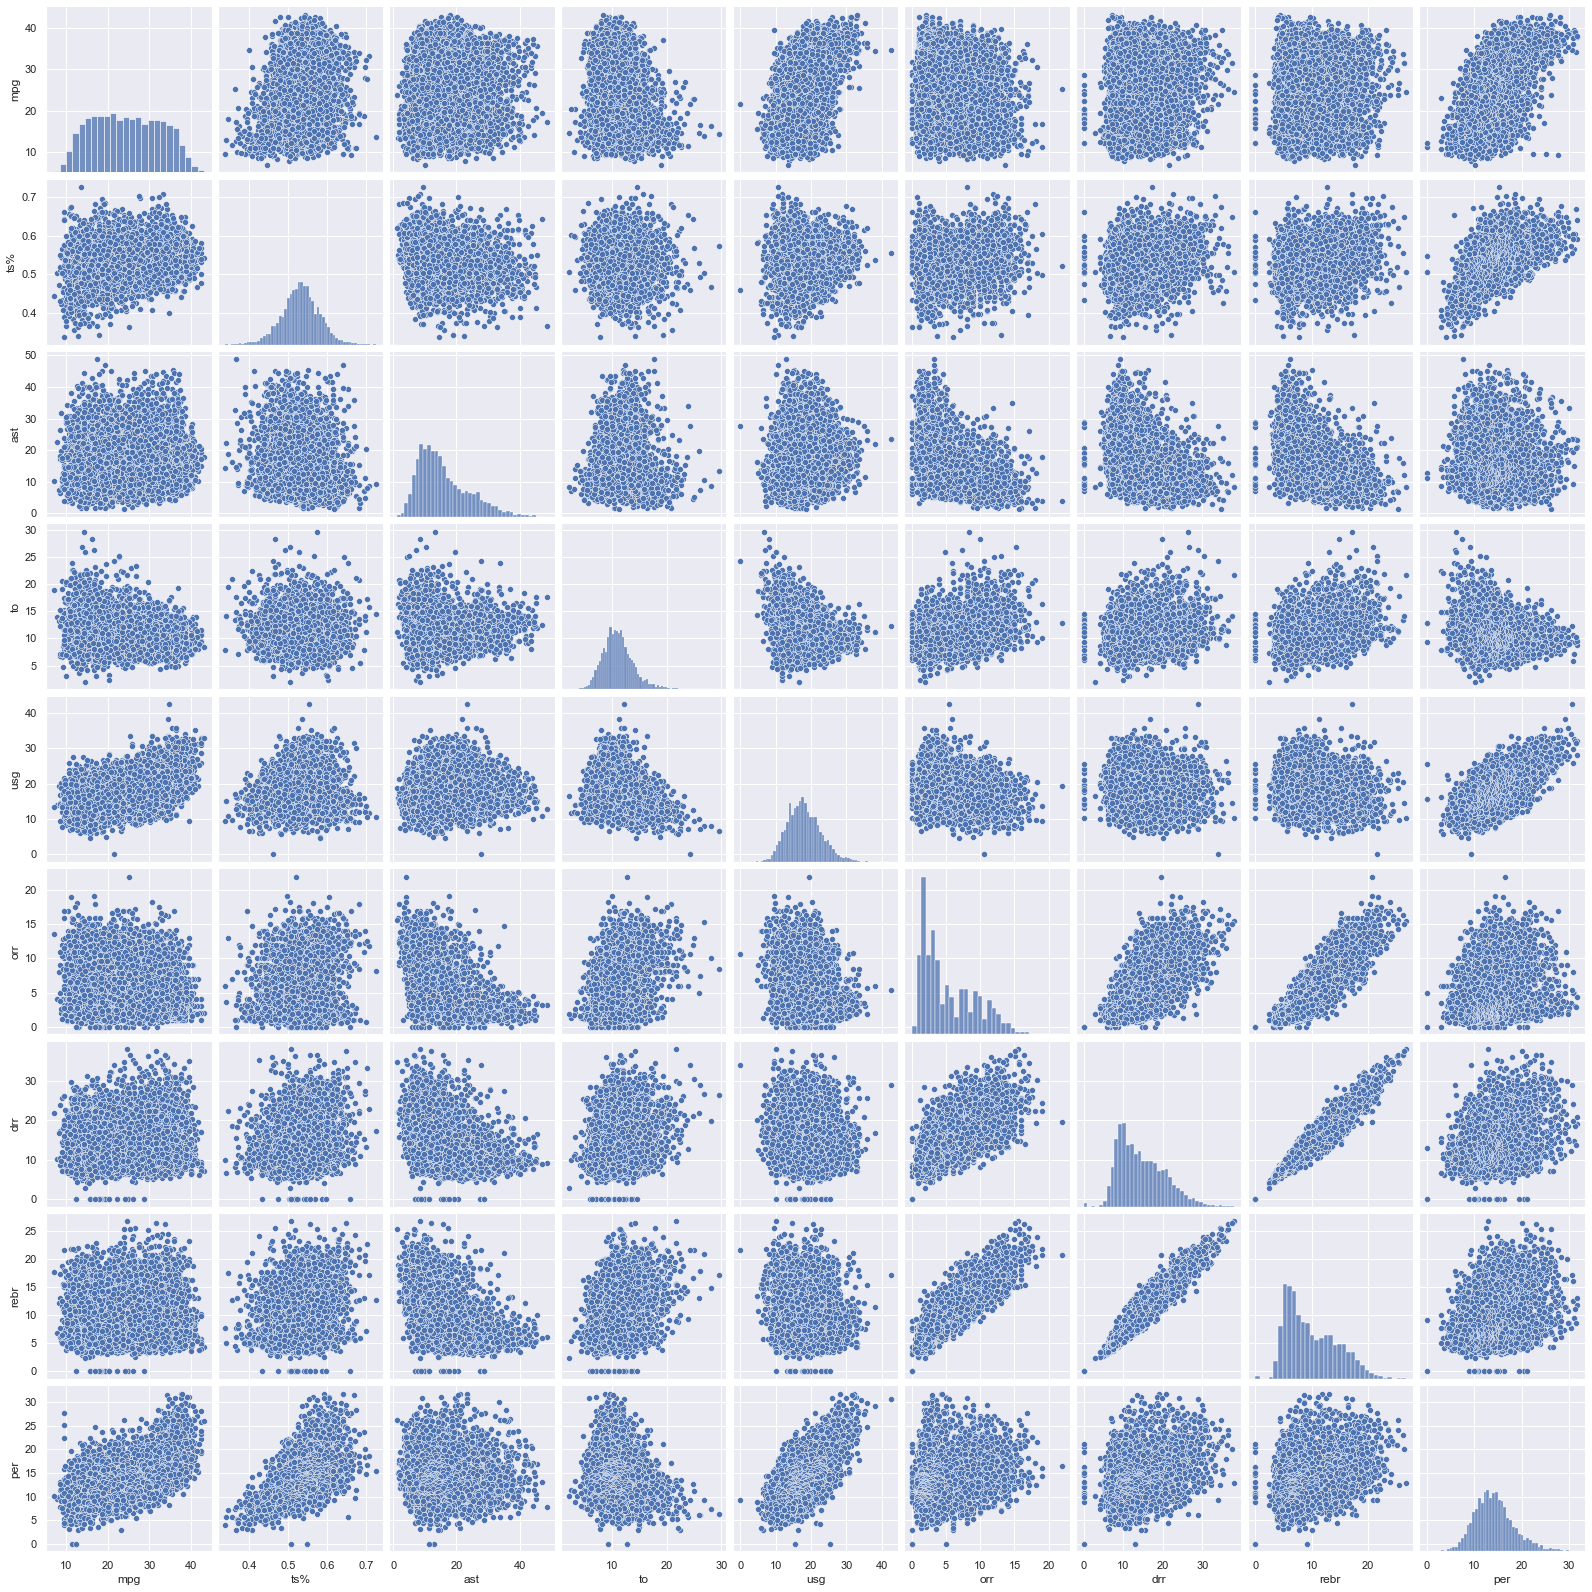

In [9]:
# choose a sns pairplot to see how each feature is realted to PER
sns.pairplot(per_data)

Looking at feature pairplots vs PER - they're pretty messy. Some look linear, others like they have a lot of noise and could possibly be polynomial. We know all have some bearing on the PER calculation

Will follow this up using a correlation matrix to check for statistical relationship between each feature and PER. However, the data looks as if it may be a good candidate for a non-linear model (ie: Neural Network)

#### Correlation between PER and Features

The pairplot gave some useful information concerning the relationships between PER and the various other features - some appear linear, others perhaps best modeled as polynomials. 

We will generate mathematical correlations between the others

In [10]:
# get correlations across dataframe:
corr = per_data.corr()

# interested in how each correlates with per:
per_corr = corr[['per']]
per_corr

,per
mpg,0.595452
ts%,0.582373
ast,-0.038877
to,-0.207722
usg,0.659476
orr,0.214795
drr,0.338760
rebr,0.311737
per,1.000000


Text(0.5, 1.0, 'Correlation Heatmap - Advanced NBA Statistics vs PER')

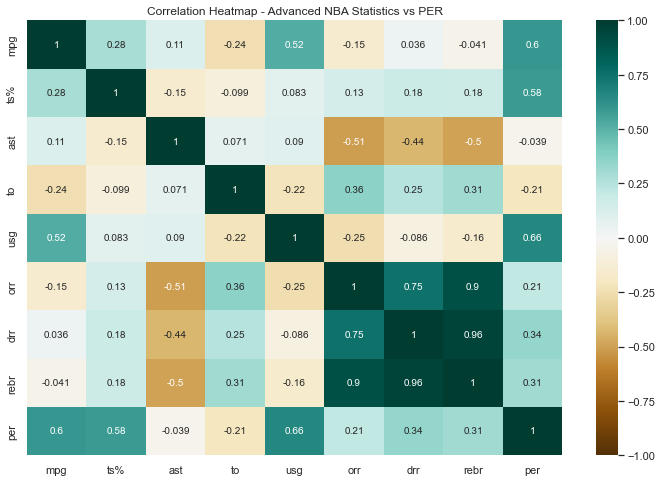

In [11]:
# generate heatmap of each feature correlation
plt.figure(figsize = (12, 8))
heatmap = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
heatmap.set_title('Correlation Heatmap - Advanced NBA Statistics vs PER')

Checking the heatmap, there are a number of high correlations between features - specifically between the rebounding rates. 

- will remove orr and drr from the X variable going forward and re-examine with just a single rebounding rate

In [12]:
X = X.drop(['drr', 'orr'], axis = 1)
X

,mpg,ts%,ast,to,usg,rebr
0,39.4,0.564,15.0,7.1,32.6,9.5
1,37.8,0.602,10.7,10.1,27.8,16.5
2,41.5,0.550,16.0,9.6,31.1,9.3
3,40.5,0.553,20.4,9.4,25.0,18.8
4,39.3,0.564,14.1,11.1,25.7,19.0
...,...,...,...,...,...,...
5399,14.2,0.417,8.4,11.0,9.1,9.1
5400,15.2,0.445,13.8,12.9,14.6,8.5
5401,10.9,0.439,11.5,15.0,16.2,7.4
5402,15.8,0.473,8.0,10.0,8.4,7.7


Now there are only 6 features to examine against PER

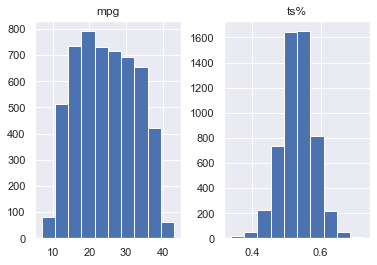

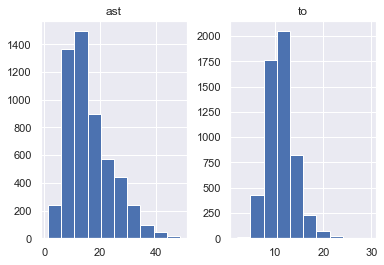

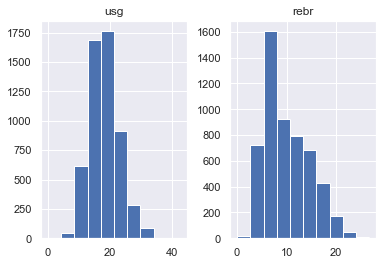

In [13]:
# re-examining histograms for the remaining features
mpgts = X.hist(column = ['mpg', 'ts%'])
astto = X.hist(column = ['ast', 'to'])
usgrebr = X.hist(column = ['usg', 'rebr'])

We find we've remove the 2 features that were most skewed

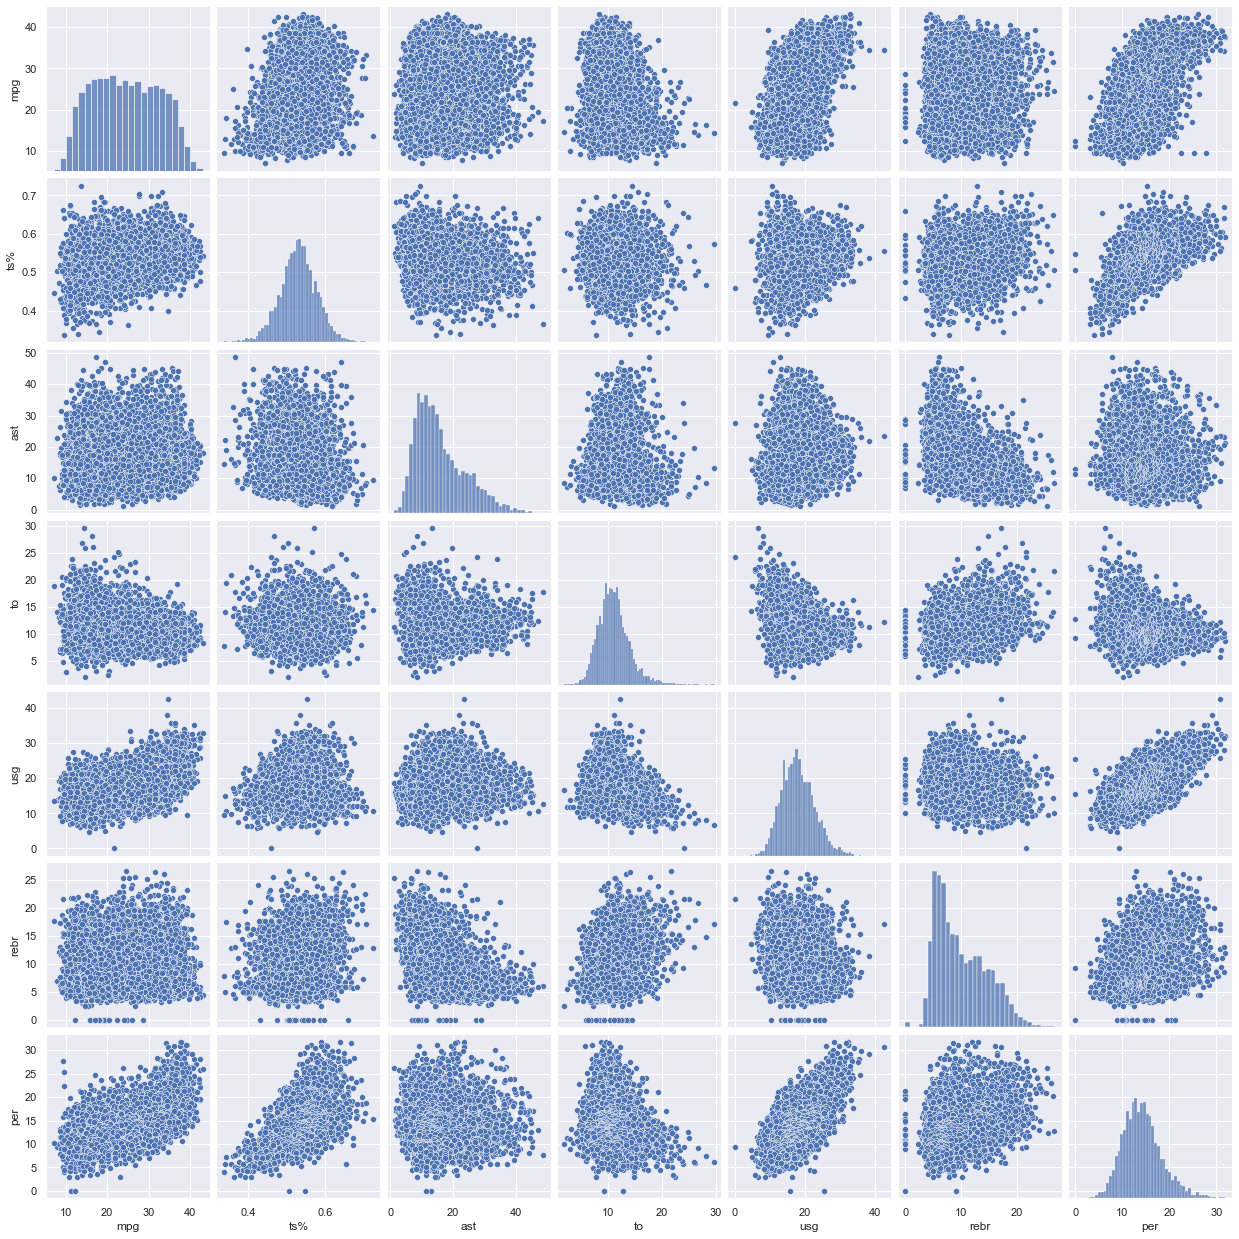

In [14]:
# re-examining the pairplot
final_per_data = per_data.drop(['orr', 'drr'], axis = 1)
sns.pairplot(final_per_data)

There are still some non-linearities in the relationships - becoming more clear that these resemble a polynomial feature - in some cases, with a lot of noise

Will now be important to determine which degree of polynomial fits the best

Re-checking correlations and heat map:

In [15]:
# get correlations across dataframe:
final_corr = final_per_data.corr()

# interested in how each correlates with per:
final_per_corr = corr[['per']]
final_per_corr

,per
mpg,0.595452
ts%,0.582373
ast,-0.038877
to,-0.207722
usg,0.659476
orr,0.214795
drr,0.338760
rebr,0.311737
per,1.000000


Text(0.5, 1.0, 'Correlation Heatmap - Advanced NBA Statistics vs PER')

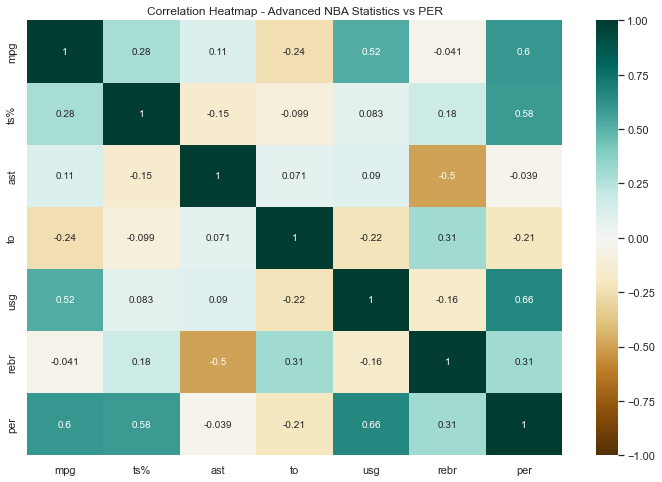

In [16]:
plt.figure(figsize = (12, 8))
final_heatmap = sns.heatmap(final_corr, vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
final_heatmap.set_title('Correlation Heatmap - Advanced NBA Statistics vs PER')

### Regression Analysis

We will evaluate a vanilla linear model, based on the success from the previous analysis, as it offered the best combination of performance and explainability

#### Linear Regression

In [17]:
# model has 5404 rows, with 6 features
print('Feature Shape: ', X.shape)
print('Target Shape: ', y.shape)

Feature Shape:  (5404, 6)
Target Shape:  (5404,)


In [18]:
# split data into training and testing sets - choose a 70/30 train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 72018)
print('X Train: ', X_train.shape)
print('y Train: ', y_train.shape)
print('X Test: ', X_test.shape)
print('y Test: ', y_test.shape)

X Train:  (3782, 6)
y Train:  (3782,)
X Test:  (1622, 6)
y Test:  (1622,)


In [19]:
# scale data using Standard Scaler
from sklearn.preprocessing import StandardScaler

# initiate instance of class
s = StandardScaler()

# transform trainnig data
X_train_s = s.fit_transform(X_train)

# check shaoe
print('Compare Shapes: ', X_train.shape, X_train_s.shape)

Compare Shapes:  (3782, 6) (3782, 6)


In [20]:
# Regressions
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

### Linear Regression:
# create instance of class
lr = LinearRegression()
# fit model to data
lr_model = lr.fit(X_train_s, y_train)
# transform the X_test values using the scaler object
X_test_s = s.transform(X_test)
# predict values from model
y_pred_lr = lr.predict(X_test_s)
# generate R2 Score
lr_score = r2_score(y_pred_lr, y_test)
lr_mse = mean_squared_error(y_pred_lr, y_test)
print('Linear Regression Results')
print('R2 Score: ', lr_score)
print('MSE: ', lr_mse)

Linear Regression Results
R2 Score:  0.8662424314565693
MSE:  2.0062382848547453


##### Coefficients for each Model

In [21]:
features = X.columns.to_list()
lr_coefficients = lr.coef_
feature_df = pd.DataFrame()
feature_df['features'] = features
feature_df['Linear'] = lr_coefficients

feature_df

,features,Linear
0,mpg,0.553614
1,ts%,1.796195
2,ast,0.925834
3,to,-0.748347
4,usg,2.473734
5,rebr,2.107803


#### Deep Learning  - Feedforward Neural Network

We will now attempt to set up a model of a feed forward neural network, with multiple different configurations, to see if we can improve upon the vanilla linear regression. We will start with a model with:
- 2 hidden layers, expanding from the 6 input values (6 variables) to 2 hidden layers of width = 12
- The final output will be a single value, given for the PER that is determined from the data for each model
- each activation function will be a ReLU

The model will vary based on the max number of epochs, as well as the learning rate (lower learning rate = more epochs)

##### Model 1: Learning Rate = 0.0001, Num Epochs = 1000 (w/ early stopping, patience = 20), SGD Optimizer, Mean Absolute Error Loss Function

In [22]:
from tensorflow.keras.models  import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [23]:
# Define the Model 
# Input size is 6-dimensional
# 3 hidden layers, 12 hidden nodes, ReLU activation
# Final layer has just one node with a linear activation (to produce PER estimate)

model_1 = Sequential()
model_1.add(Dense(12,input_shape = (6,),activation = 'relu'))
model_1.add(Dense(12, activation = 'relu'))
model_1.add(Dense(12, activation = 'relu'))
model_1.add(Dense(1,activation='linear')) # output layer (PER)

In [24]:
# view the model - model is only training 409 parameters
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                84        
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 12)                156       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 409
Trainable params: 409
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Fit(Train) the Model

# Compile the model with Optimizer, Loss Function and Metrics
# will use SGD as the optimizer, mean absolute error as the error term, to account for high outlier values

# set up early stop regularization on validation loss - if loss doesn't improve in 20 epochs, shut down 
callback = EarlyStopping(monitor='val_loss', patience=20)

model_1.compile(SGD(learning_rate = 0.0001), loss = "mean_absolute_error", metrics = ["mse"])
model_1_run_hist = model_1.fit(X_train_s, y_train, validation_data=(X_test_s, y_test), epochs=1000, callbacks = [callback])

Epoch 1/1000
119/119 [==============================] - 0s 2ms/step - loss: 13.6069 - mse: 205.8257 - val_loss: 13.7574 - val_mse: 209.1509
Epoch 2/1000
119/119 [==============================] - 0s 1ms/step - loss: 13.5570 - mse: 204.5708 - val_loss: 13.7068 - val_mse: 207.8557
Epoch 3/1000
119/119 [==============================] - 0s 1ms/step - loss: 13.5047 - mse: 203.2588 - val_loss: 13.6539 - val_mse: 206.5085
Epoch 4/1000
119/119 [==============================] - 0s 1ms/step - loss: 13.4499 - mse: 201.8983 - val_loss: 13.5984 - val_mse: 205.1009
Epoch 5/1000
119/119 [==============================] - 0s 1ms/step - loss: 13.3924 - mse: 200.4746 - val_loss: 13.5400 - val_mse: 203.6261
Epoch 6/1000
119/119 [==============================] - 0s 1ms/step - loss: 13.3319 - mse: 198.9843 - val_loss: 13.4786 - val_mse: 202.0808
Epoch 7/1000
119/119 [==============================] - 0s 1ms/step - loss: 13.2682 - mse: 197.4154 - val_loss: 13.4136 - val_mse: 200.4540
Epoch 8/1000
119/119

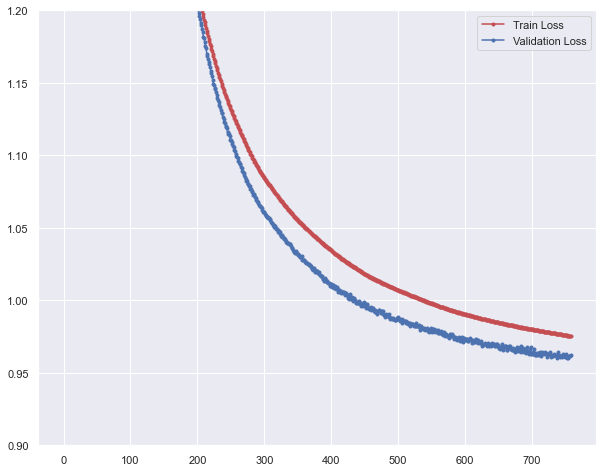

In [26]:
# plotting training vs validation losses:
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(model_1_run_hist.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(model_1_run_hist.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.set_ylim([0.9, 1.2])
ax.legend()

As we can see, the early stopping portion of the algorithm shut down after 759 epochs, since the validation loss function was no longer decreasing

In [27]:
# predict values based on model
y_pred_model_1 = model_1.predict(X_test_s)
print("R2 Score: ", r2_score(y_pred_model_1, y_test))

R2 Score:  0.894900583179702


In [28]:
df = pd.DataFrame(y_test)
df['LR Modeled PER'] = y_pred_lr
df['NN Modeled PER'] = y_pred_model_1
df['Delta - LR'] = np.abs(df['per'] - df['LR Modeled PER'])
df['Delta - NN'] = np.abs(df['per'] - df['NN Modeled PER'])
df = df.reset_index()
df = df.drop('index', axis = 1)

df

,per,LR Modeled PER,NN Modeled PER,Delta - LR,Delta - NN
0,6.78,5.710025,7.149564,1.069975,0.369564
1,19.04,19.758733,19.421715,0.718733,0.381715
2,14.01,14.909897,14.558198,0.899897,0.548198
3,15.95,15.624370,15.426457,0.325630,0.523543
4,20.66,21.373397,20.766932,0.713397,0.106932
...,...,...,...,...,...
1617,31.56,27.147297,29.242025,4.412703,2.317975
1618,10.96,12.437914,12.103560,1.477914,1.143560
1619,16.05,14.691986,14.489381,1.358014,1.560619
1620,13.42,15.055785,14.653928,1.635785,1.233928


In [29]:
# comparing the models of each compared to the per

avg_delta_lr = np.mean(df['Delta - LR'])
med_delta_lr = np.median(df['Delta - LR'])
print('Average Delta LR: ', avg_delta_lr)
print('Median Delta LR: ', med_delta_lr)
print('-----------------------------------')
avg_delta_nn = np.mean(df['Delta - NN'])
med_delta_nn = np.median(df['Delta - NN'])
print('Average Delta NN: ', avg_delta_nn)
print('Median Delta NN: ', med_delta_nn)

Average Delta LR:  1.061748723911128
Median Delta LR:  0.8180365088681354
-----------------------------------
Average Delta NN:  0.9626117020382393
Median Delta NN:  0.7690382003784171


As we can see, the median and average deviations from y_train (per in the test data set) is ~10% lower when using the neural network set up

In [30]:
# as we can see, the predicted values using our first feedforward neural network are closer to the test values than they were using vanilla linear regression:

print('Comparing R2 Scores')
print('R2 Score - LR:', lr_score)
print('R2 Score - NN:',  r2_score(y_pred_model_1, y_test))
print('-------------------')
print('Comparing MSE')
print('MSE - LR:', lr_mse)
print('MSE - NN:', model_1_run_hist.history["val_mse"][-1]) # get the last value prior to early stopping

Comparing R2 Scores
R2 Score - LR: 0.8662424314565693
R2 Score - NN: 0.894900583179702
-------------------
Comparing MSE
MSE - LR: 2.0062382848547453
MSE - NN: 1.625856637954712


As we can see the MSE of the Feedforward Neural Network is lower (~ 20%) than that of the Linear Regression

It is safe to say that this particular network does a better job of modeling the PER output f/ advanced statistics than a vanilla linear regression

##### Model 2: Learning Rate = 0.000025, Num Epochs = 1000, Adam Optimizer, Mean Absolute Error Loss Function. Early stopping set up (patience = 20)

In [31]:
# Define the Model 
# Input size is 6-dimensional
# 3 hidden layers, 12 hidden nodes, ReLU activation
# Final layer has just one node with a linear activation (to produce PER estimate)

model_2 = Sequential()
model_2.add(Dense(12,input_shape = (6,),activation = 'relu'))
model_2.add(Dense(12, activation = 'relu'))
model_2.add(Dense(12, activation = 'relu'))
model_2.add(Dense(1,activation='linear')) # output layer (PER)

In [32]:
# view the model - model is only training 409 parameters
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 12)                84        
                                                                 
 dense_5 (Dense)             (None, 12)                156       
                                                                 
 dense_6 (Dense)             (None, 12)                156       
                                                                 
 dense_7 (Dense)             (None, 1)                 13        
                                                                 
Total params: 409
Trainable params: 409
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Fit(Train) the Model

# Compile the model with Optimizer, Loss Function and Metrics
# will use Adam as the optimizer, mean absolute error as the error term, to account for high outlier values
# set up early stop regularization on validation loss - if loss doesn't improve in 20 epochs, shut down 
callback2 = EarlyStopping(monitor='val_loss', patience=20)

model_2.compile(Adam(learning_rate = 0.000025), loss = "mean_absolute_error", metrics = ["mse"])
model_2_run_hist = model_2.fit(X_train_s, y_train, validation_data=(X_test_s, y_test), epochs=1000, callbacks = [callback2])

Epoch 1/1000
119/119 [==============================] - 1s 2ms/step - loss: 14.3052 - mse: 223.1730 - val_loss: 14.4563 - val_mse: 226.8803
Epoch 2/1000
119/119 [==============================] - 0s 1ms/step - loss: 14.2716 - mse: 222.1732 - val_loss: 14.4219 - val_mse: 225.8526
Epoch 3/1000
119/119 [==============================] - 0s 1ms/step - loss: 14.2371 - mse: 221.1549 - val_loss: 14.3864 - val_mse: 224.7961
Epoch 4/1000
119/119 [==============================] - 0s 1ms/step - loss: 14.2015 - mse: 220.1000 - val_loss: 14.3498 - val_mse: 223.7072
Epoch 5/1000
119/119 [==============================] - 0s 1ms/step - loss: 14.1646 - mse: 219.0179 - val_loss: 14.3118 - val_mse: 222.5830
Epoch 6/1000
119/119 [==============================] - 0s 1ms/step - loss: 14.1261 - mse: 217.8907 - val_loss: 14.2722 - val_mse: 221.4189
Epoch 7/1000
119/119 [==============================] - 0s 1ms/step - loss: 14.0858 - mse: 216.7161 - val_loss: 14.2308 - val_mse: 220.2039
Epoch 8/1000
119/119

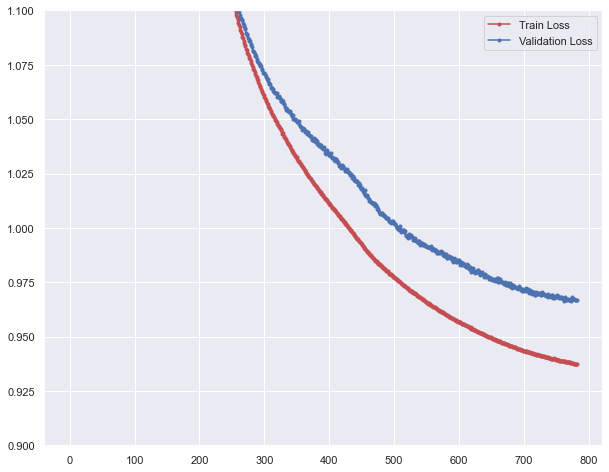

In [34]:
# plotting training vs validation losses:
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(model_2_run_hist.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(model_2_run_hist.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.set_ylim([0.9, 1.1])
ax.legend()

We can see, using the Adam optimizer with the standard beta values that learning rate needs to be lowered, to account for the use of momentum in this algorithm. With the learning rate cut in a quarter (0.000025), it is stopped converging after ~ 780 epochs, only 20 more than the SGD optimizer

In [35]:
# predict values based on model
y_pred_model_2 = model_2.predict(X_test_s)
print("R2 Score: ", r2_score(y_pred_model_2, y_test))

R2 Score:  0.8952749527413028


In [36]:
df2 = pd.DataFrame(y_test)
df2['LR Modeled PER'] = y_pred_lr
df2['NN Modeled 2 PER'] = y_pred_model_2
df2['Delta - LR'] = np.abs(df2['per'] - df2['LR Modeled PER'])
df2['Delta - NN 2'] = np.abs(df2['per'] - df2['NN Modeled 2 PER'])

df2

,per,LR Modeled PER,NN Modeled 2 PER,Delta - LR,Delta - NN 2
3289,6.78,5.710025,6.435768,1.069975,0.344232
4395,19.04,19.758733,19.613468,0.718733,0.573468
1125,14.01,14.909897,14.876415,0.899897,0.866415
1720,15.95,15.624370,15.441396,0.325630,0.508604
4380,20.66,21.373397,21.041044,0.713397,0.381044
...,...,...,...,...,...
4346,31.56,27.147297,29.400038,4.412703,2.159962
890,10.96,12.437914,12.058404,1.477914,1.098404
3412,16.05,14.691986,14.567751,1.358014,1.482249
4542,13.42,15.055785,15.090532,1.635785,1.670532


In [37]:
# comparing the models of each compared to the per

avg_delta_lr2 = np.mean(df2['Delta - LR'])
med_delta_lr2 = np.median(df2['Delta - LR'])
print('Average Delta LR: ', avg_delta_lr2)
print('Median Delta LR: ', med_delta_lr2)
print('-----------------------------------')
avg_delta_nn2 = np.mean(df2['Delta - NN 2'])
med_delta_nn2 = np.median(df2['Delta - NN 2'])
print('Average Delta NN: ', avg_delta_nn2)
print('Median Delta NN: ', med_delta_nn2)

Average Delta LR:  1.061748723911128
Median Delta LR:  0.8180365088681354
-----------------------------------
Average Delta NN:  0.9668021772939688
Median Delta NN:  0.769151096343994


As we can see, the deltas for the Adam optimizer neural network are about the same as they were for the SGD optimizer

In [38]:
# as we can see, the predicted values using our second feedforward neural network are closer to the test values than they were using vanilla linear regression:
# the MSE for this model is slightly worse than the 1.625 observed for the model with the SGD optimizer, with a slightly better R2 score. To this point, this is the best model we have

print('Comparing R2 Scores')
print('R2 Score - LR:', lr_score)
print('R2 Score - NN 2:',  r2_score(y_pred_model_2, y_test))
print('-------------------')
print('Comparing MSE')
print('MSE - LR:', lr_mse)
print('MSE - NN 2:', model_2_run_hist.history["val_mse"][-1])

Comparing R2 Scores
R2 Score - LR: 0.8662424314565693
R2 Score - NN 2: 0.8952749527413028
-------------------
Comparing MSE
MSE - LR: 2.0062382848547453
MSE - NN 2: 1.633289098739624


##### Model 3: Deeper Network - Learning Rate = 0.000025, Num Epochs = 2000, Adam Optimizer, Mean Absolute Error Loss Function. Early Stopping Set (patience = 20)

In [39]:
# Define the Model - will make model deeper
# Input size is 6-dimensional
# 5 hidden layers, 12 hidden nodes, ReLU activation
# Final layer has just one node with a linear activation (to produce PER estimate)

model_3 = Sequential()
model_3.add(Dense(12,input_shape = (6,),activation = 'relu'))
model_3.add(Dense(12, activation = 'relu'))
model_3.add(Dense(12, activation = 'relu'))
model_3.add(Dense(12, activation = 'relu'))
model_3.add(Dense(12, activation = 'relu'))
model_3.add(Dense(1,activation='linear')) # output layer (PER)

In [40]:
# view the model - model is only training 409 parameters
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 12)                84        
                                                                 
 dense_9 (Dense)             (None, 12)                156       
                                                                 
 dense_10 (Dense)            (None, 12)                156       
                                                                 
 dense_11 (Dense)            (None, 12)                156       
                                                                 
 dense_12 (Dense)            (None, 12)                156       
                                                                 
 dense_13 (Dense)            (None, 1)                 13        
                                                                 
Total params: 721
Trainable params: 721
Non-trainable 

This time the network will have to train 721 (vs the previou 409) parameters. It will take more time/computational rigor

In [41]:
# Fit(Train) the Model

# Compile the model with Optimizer, Loss Function and Metrics
# will use Adam as the optimizer (given its slightly better performance in Model 2), mean absolute error as the error term, to account for high outlier values
# set up early stop regularization on validation loss - if loss doesn't improve in 20 epochs, shut down 
callback3 = EarlyStopping(monitor='val_loss', patience=20)

model_3.compile(Adam(learning_rate = 0.000025), loss = "mean_absolute_error", metrics = ["mse"])
model_3_run_hist = model_3.fit(X_train_s, y_train, validation_data=(X_test_s, y_test), epochs=2000, callbacks = [callback3])

Epoch 1/2000
119/119 [==============================] - 1s 2ms/step - loss: 14.2173 - mse: 220.3715 - val_loss: 14.3656 - val_mse: 223.9904
Epoch 2/2000
119/119 [==============================] - 0s 1ms/step - loss: 14.1854 - mse: 219.4189 - val_loss: 14.3315 - val_mse: 222.9619
Epoch 3/2000
119/119 [==============================] - 0s 1ms/step - loss: 14.1493 - mse: 218.3425 - val_loss: 14.2923 - val_mse: 221.7801
Epoch 4/2000
119/119 [==============================] - 0s 1ms/step - loss: 14.1079 - mse: 217.1095 - val_loss: 14.2468 - val_mse: 220.4116
Epoch 5/2000
119/119 [==============================] - 0s 1ms/step - loss: 14.0597 - mse: 215.6706 - val_loss: 14.1942 - val_mse: 218.8329
Epoch 6/2000
119/119 [==============================] - 0s 1ms/step - loss: 14.0040 - mse: 214.0134 - val_loss: 14.1330 - val_mse: 217.0025
Epoch 7/2000
119/119 [==============================] - 0s 1ms/step - loss: 13.9398 - mse: 212.1159 - val_loss: 14.0631 - val_mse: 214.9111
Epoch 8/2000
119/119

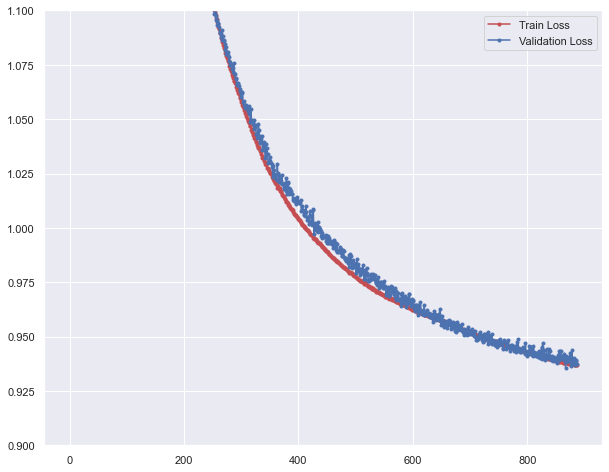

In [42]:
# plotting training vs validation losses:
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(model_3_run_hist.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(model_3_run_hist.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.set_ylim([0.9, 1.1])
ax.legend()

The deeper neural network (5 layer vs 3 layer) surprisingly didn't really take any more epochs to train

In [43]:
# predict values based on model
y_pred_model_3 = model_3.predict(X_test_s)
print("R2 Score: ", r2_score(y_pred_model_3, y_test))

R2 Score:  0.8997540912324032


The R2 score of al the networks wasn't much different, gaining about 0.005 of a point

In [44]:
# versus the 3 layer Adam optimized network

print('Model 2 - 3 Layer NN')
print('Validation Loss: ', model_2_run_hist.history['val_loss'][-1])
print('--------------------------------------------------------')
print('Model 3 - 5 Layer NN')
print('Validation Loss: ', model_3_run_hist.history['val_loss'][-1])

Model 2 - 3 Layer NN
Validation Loss:  0.9668021202087402
--------------------------------------------------------
Model 3 - 5 Layer NN
Validation Loss:  0.9373064041137695


The validation loss for the 5 layer NN is lower than that of the 3 layer NN, all other things being equal

In [45]:
df3 = pd.DataFrame(y_test)
df3['LR Modeled PER'] = y_pred_lr
df3['NN Modeled 3 PER'] = y_pred_model_3
df3['Delta - LR'] = np.abs(df3['per'] - df3['LR Modeled PER'])
df3['Delta - NN 3'] = np.abs(df3['per'] - df3['NN Modeled 3 PER'])

df3

,per,LR Modeled PER,NN Modeled 3 PER,Delta - LR,Delta - NN 3
3289,6.78,5.710025,6.490449,1.069975,0.289551
4395,19.04,19.758733,20.065443,0.718733,1.025443
1125,14.01,14.909897,14.672076,0.899897,0.662076
1720,15.95,15.624370,15.336730,0.325630,0.613270
4380,20.66,21.373397,20.826002,0.713397,0.166002
...,...,...,...,...,...
4346,31.56,27.147297,29.847858,4.412703,1.712142
890,10.96,12.437914,11.706551,1.477914,0.746551
3412,16.05,14.691986,14.271643,1.358014,1.778357
4542,13.42,15.055785,14.640738,1.635785,1.220738


In [46]:
# comparing the models of each compared to the per

avg_delta_lr3 = np.mean(df3['Delta - LR'])
med_delta_lr3 = np.median(df3['Delta - LR'])
print('Average Delta LR: ', avg_delta_lr3)
print('Median Delta LR: ', med_delta_lr3)
print('-----------------------------------')
avg_delta_nn3 = np.mean(df3['Delta - NN 3'])
med_delta_nn3 = np.median(df3['Delta - NN 3'])
print('Average Delta NN: ', avg_delta_nn3)
print('Median Delta NN: ', med_delta_nn3)

Average Delta LR:  1.061748723911128
Median Delta LR:  0.8180365088681354
-----------------------------------
Average Delta NN:  0.9373065665794214
Median Delta NN:  0.742143802642822


As we can see, the deltas are a little better here than they were for the previous Neural Network set-up. akes sense, as both the R2 was higher and validation loss was lower

In [47]:
# as we can see, the predicted values using our second feedforward neural network are closer to the test values than they were using vanilla linear regression:
# the MSE for this model is slightly worse (1.634) than the 1.623 observed for the 3 layer model with the Adam optimizer, with a slightly better R2 score, with a lower R2 score

print('Comparing R2 Scores')
print('R2 Score - LR:', lr_score)
print('R2 Score - NN 3:',  r2_score(y_pred_model_3, y_test))
print('-------------------')
print('Comparing MSE')
print('MSE - LR:', lr_mse)
print('MSE - NN 3:', model_3_run_hist.history["val_mse"][-1])

Comparing R2 Scores
R2 Score - LR: 0.8662424314565693
R2 Score - NN 3: 0.8997540912324032
-------------------
Comparing MSE
MSE - LR: 2.0062382848547453
MSE - NN 3: 1.5512840747833252


#### Take Aways

When compared to the vanilla linear regression from thr first assignment in the Linear Regression course, for this data set, each of the prescribed neural network models performed slightly better (loss functions, MSE were 20 - 25% lower)

What we can say in this case, for the neural networks, was that deeper was better, as the increase in depth (from 3 - 5 layers) produced an increase in performance (~ 5% lower validation loss) versus the shallower networks. 

In terms of cimputational power, for a dataset this small, it is probably worth it to set up a neurl net for the 20 - 25% performance gain. however, for a larger dataset, the computational expense may not justify the performance gain, given that the vanilla linear regression already produced a fairly high R2 (0.86+)